In [1]:
# Identifying Similar Documents or word lists based on a measure called cosine similarity
# A topic of Natural Language Processing/ Text processing/Document Analysis

In [2]:
import wordcloud as wc
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
import seaborn as sns

In [3]:
user_interests = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]
len(user_interests)

15

In [4]:
def flatten(lol):
    '''Convert a list of lists (of words) in a flat sequence of words'''
    flat = []
    for sublist in lol:
        flat.extend(sublist)
    return flat
flat = flatten(user_interests)

In [5]:
unique = set(flat)
unique


{'Big Data',
 'C++',
 'Cassandra',
 'HBase',
 'Hadoop',
 'Haskell',
 'Java',
 'Mahout',
 'MapReduce',
 'MongoDB',
 'MySQL',
 'NoSQL',
 'Postgres',
 'Python',
 'R',
 'Spark',
 'Storm',
 'artificial intelligence',
 'databases',
 'decision trees',
 'deep learning',
 'libsvm',
 'machine learning',
 'mathematics',
 'neural networks',
 'numpy',
 'pandas',
 'probability',
 'programming languages',
 'regression',
 'scikit-learn',
 'scipy',
 'statistics',
 'statsmodels',
 'support vector machines',
 'theory'}

In [6]:
L = [1,2,3]
L.append(4)
L


[1, 2, 3, 4]

In [7]:
L.append([5,6,7])
L

[1, 2, 3, 4, [5, 6, 7]]

In [8]:
L + [4,5,6]
L = L + [4,5,6]
L

[1, 2, 3, 4, [5, 6, 7], 4, 5, 6]

In [9]:
# Extend
L.extend([4,5,6])
L

[1, 2, 3, 4, [5, 6, 7], 4, 5, 6, 4, 5, 6]

In [10]:
unique = set(flat)
unique
len(unique) # 36 elements in our set

36

In [11]:
counts = Counter(flat)
top5 = counts.most_common(5)
top5

[('Python', 4), ('R', 4), ('Big Data', 3), ('HBase', 3), ('Java', 3)]

In [12]:
def recommend(interests, most_common, max_results = 5):
    suggestions = [interest for interest, count in most_common if interest not in interests]
    return suggestions

user0 = user_interests[0]
most_common = Counter(flat).most_common()

print("User interests", user_interests[0])
print('Most Common', Counter(flat).most_common())
print('Recommendations', recommend(user0,most_common,3))

User interests ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
Most Common [('Python', 4), ('R', 4), ('Big Data', 3), ('HBase', 3), ('Java', 3), ('statistics', 3), ('regression', 3), ('probability', 3), ('Hadoop', 2), ('Cassandra', 2), ('MongoDB', 2), ('Postgres', 2), ('scikit-learn', 2), ('statsmodels', 2), ('pandas', 2), ('machine learning', 2), ('libsvm', 2), ('C++', 2), ('neural networks', 2), ('deep learning', 2), ('artificial intelligence', 2), ('Spark', 1), ('Storm', 1), ('NoSQL', 1), ('scipy', 1), ('numpy', 1), ('decision trees', 1), ('Haskell', 1), ('programming languages', 1), ('mathematics', 1), ('theory', 1), ('Mahout', 1), ('MapReduce', 1), ('databases', 1), ('MySQL', 1), ('support vector machines', 1)]
Recommendations ['Python', 'R', 'statistics', 'regression', 'probability', 'MongoDB', 'Postgres', 'scikit-learn', 'statsmodels', 'pandas', 'machine learning', 'libsvm', 'C++', 'neural networks', 'deep learning', 'artificial intelligence', 'NoSQL', 'sc

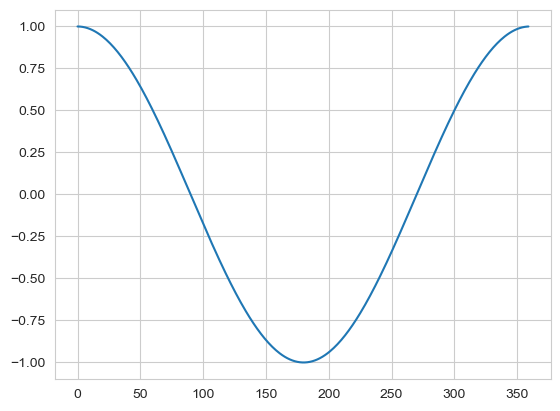

In [15]:
cos = [math.cos(angle * math.pi / 180) for angle in  range(360)]
plt.grid('True')
plt.plot(cos)

In [19]:
"""
A dot B = |A| |B| cos(theta)

so,

cos(theta) = A dot B / (|A| |B|)  = similarity

"""

"""

Unique
Words          A         B
-------      -----     -----
Hadoop         1         1
Python         0         1
Java           0         0
R              1         1
Statistics     1         1

|A| = sqrt(3) = 1.7
|B| = sqrt(4) = 2.0

A dot B = 1 + 0 + 0 + 1 + 1 = 3

cos(theta) = 3 / (2.0 x 1.7) = 0.866 (pretty similar!)

"""

"'\nA dot B = |A| |B\n"

In [21]:
# Convert list of words to a word vector

def vectorize(words, unique):
    return [1 if word in words else 0 for word in unique]

In [23]:
vectorize(user0,unique)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0]

In [24]:
# Vector Function
def mag(v):
    '''Mag of vector
    v - vector in list component notation
    '''
    return sum([i**2 for i in v]) ** .5

In [25]:
mag([1,5,-1])

5.196152422706632

In [32]:
def dot(u,v):
    '''dot product of two vectors
    u vector 1
    v vector 2
    '''
    return sum(i*j for i,j in zip(u,v))

In [33]:
dot([5,5,0],[4,7,1])

55

In [30]:
list(zip([5,5,0],[4,7,1]))

[(5, 4), (5, 7), (0, 1)]

In [34]:
def cosine_similarity(u,v):
    '''Cosine Similarity Between two vectors'''
    cos_theta = dot(u,v) / (mag(u) * (mag(v)))
    return cos_theta

In [36]:
cosine_similarity([5,5,0],[4,7,1])

0.957427107756338

In [42]:
arr = np.zeros((15,15), dtype = float)
for i in range(15):
    vi = vectorize(user_interests[i], unique)
    for j in range(i, 15):
        vj = vectorize(user_interests[j], unique)
        arr[i,j] = cosine_similarity(vi,vj)
        arr[j,i] = arr[i,j]
arr

array([[1.        , 0.3380617 , 0.        , 0.        , 0.        ,
        0.15430335, 0.        , 0.        , 0.18898224, 0.56694671,
        0.        , 0.        , 0.        , 0.16903085, 0.        ],
       [0.3380617 , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.6       , 0.        ],
       [0.        , 0.        , 1.        , 0.18257419, 0.        ,
        0.16666667, 0.        , 0.20412415, 0.        , 0.        ,
        0.23570226, 0.        , 0.47140452, 0.        , 0.        ],
       [0.        , 0.        , 0.18257419, 1.        , 0.2236068 ,
        0.36514837, 0.4472136 , 0.        , 0.        , 0.        ,
        0.51639778, 0.2236068 , 0.51639778, 0.        , 0.25819889],
       [0.        , 0.        , 0.        , 0.2236068 , 1.        ,
        0.        , 0.        , 0.25      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

<Axes: title={'center': 'Cosine Similarity Heatmap'}>

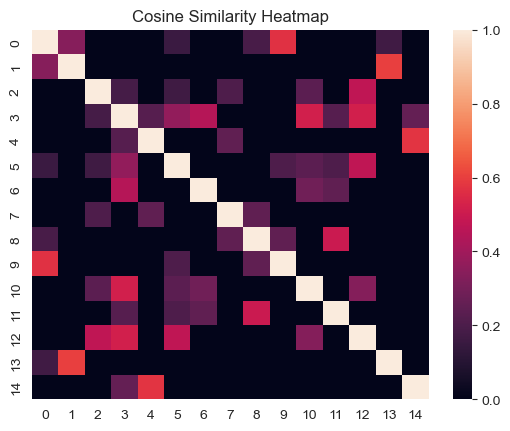

In [46]:
plt.title('Cosine Similarity Heatmap')
sns.heatmap(arr)

In [47]:
arr[0,9]

0.5669467095138409

In [48]:
user_interests[0]

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']

In [49]:
user_interests[9]

['Hadoop', 'Java', 'MapReduce', 'Big Data']

In [50]:
A - B # elemetns in a that are not in B
B - A # Elements in B that are not in A

NameError: name 'A' is not defined

In [57]:
# Digression Sets
# A set is an unordered collection of distinct elements

A = {1,2,3,4,5,6}
B = {4,5,6,7,8,9}

# Cardinality (# of elements)

len(A)

# Union elements in A or B
A | B

# Intersection elements in A and B
A & B

# Difference
A - B
B - A

# Symetric Difference (often denoted with the triangle operator)
# in one set or the other but not both
A ^ B
(A|B)-(A&B) # same as symetric diff

{1, 2, 3, 7, 8, 9}

In [58]:
# adding an element to set
A.add(99)
A

{1, 2, 3, 4, 5, 6, 99}

In [61]:
# Emphasis on distincty
C = {1,1,1,1,1,1,2,2,2,2,3,3,3}

In [62]:
# membership
2 in C

True

In [63]:
4 in C

False

In [64]:
# elements of a set must be immutable
{1,2,3,[4,5]}

TypeError: unhashable type: 'list'

In [65]:
user0 = user_interests[0]
user9 = user_interests[9]


In [66]:
set(user9)- set(user0)

{'MapReduce'}

In [ ]:
def recommend(interests,user_interests):
    pass